# Homework Lecture 8

Write a shooting method to calculate the Legendre polynomials with n=5.

\begin{equation}
\frac{d^2 P_n}{d x^2} = \frac{1}{1-x^2}[2x\frac{dP_n}{dx}-n(n+1)P_n],
\end{equation}

The integration domain can be reduced from [-1,1] to [0,1].

We want to integrate
\begin{equation}
y''=\frac{1}{1-x^2}[2xy'-n(n+1)y],
\end{equation}
from 0 to 1.
We will use the initial and boundary conditions
\begin{eqnarray}
y(0) &=& 0\\
y'(0) &=& y'_a\\
\end{eqnarray}

We will vary y'(0) until y(1)=1 with the bisection method.

We have a second order differential equation so we will break it up into two first order differential equations

\begin{eqnarray}
\frac{dy}{dx} &=& v_y,\\
\frac{dv_y}{dx} &=& \frac{1}{1-x^2}[2xy'-n(n+1)y].
\end{eqnarray}


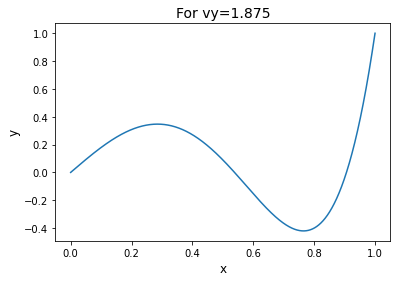

This is how our resulting plot should look


In [1]:
import numpy as np
import matplotlib.pyplot as plt

vy=1.875     #this is the value we want to get
vymin=1.500
vymax=2.500
h=1.e-4
y=[0.,vy]    #y[0]=y, y[1]=vy
targety=1.
x=0.
xend=1.

def f(t, y):
    '''
    Legendre polynomial function
    '''
    f=np.zeros(2)
    n=5
    f[0]=y[1]    #dy/dx
    f[1]=(1/(1-x*x))*(2*x*y[1]-n*(n+1)*y[0])
    return f

def rk4(t, h, y, n):
    '''
    Runge-Kutta method for integration
    '''
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

xp=[x]
yp=[y[0]]

while(x<xend):
    '''
    loop to get our x points and y points on the interval 0 to 1
    '''
    if((x+h)>xend):
        h=xend-x
    y = rk4(x,h,y,2)
    xp=np.append(xp,x)
    yp=np.append(yp,y[0])
    x= x+h

plt.plot(xp,yp)
plt.title('For vy=1.875', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

print('This is how our resulting plot should look')

Now we will use the bisection method to calculate the velocity which should be 1.875 like the plot above.

We will start with vy minimum being 1.5 and maximum being 2.5.
The bisection method will calculate the midpoint between the min and max velocities.
Then, the program will get the function values given the midpoint velority and change to a new midpoint accordingly.
The final function should equal one when x=1.

In [2]:
vymin=1.500   
vymax=2.500 
maxiter=100
for iter in range(maxiter):
    xp=[]
    yp=[]
    vy=(vymin+vymax)/2.
    y=[0.,vy]
    x=0
    while(x<xend):
        y = rk4(x,h,y,2)
        xp=np.append(xp,x)
        yp=np.append(yp,y[0])
        if(y[0]>1):    #if y is greater than 1 we've gone too far
            '''I cannot get this condition to work'''
            y[0] /= y[1] - 1.e4
            break
        x = x+h
    if(np.abs(y[0]-targety)<1.):
        '''
        This is when we have correct solution
        '''
        break
    #below are the conditions to know which way to change the velocity
    if y[0]<targety:
        vymax=vy
    else:
        vymin=vy
        
    print("iter ",iter, "vy",vy," shoot point, target",y[0],targety)
 
print("vy",vy)
plt.show()
plt.xlim(0.,1.0)
plt.ylim(-1.0,1.5)
plt.plot(xp,yp)
plt.show()

KeyboardInterrupt: 